Chapter 21
# 沿x、y方向空间等高线在平面上投影
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
# 导入符号变量
import os

from matplotlib import cm
# 导入色谱模块

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
def mesh(num = 101):
    
    # number of mesh grids
    x_array = np.linspace(-3,3,num)
    y_array = np.linspace(-3,3,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

### 1. 定义符号函数

In [3]:

# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数

# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

In [12]:
xx, yy = mesh(num = 121)
ff = f_xy_fcn(xx, yy)

### 2. 在xz平面投影

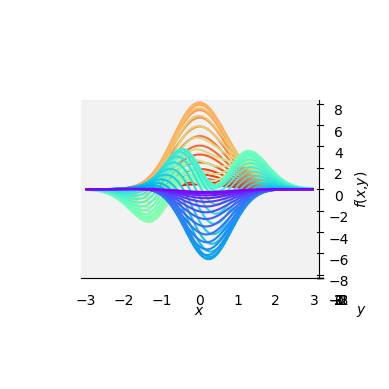

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

level_array = np.linspace(-3,3,61)
ax.contour(xx, yy, ff, zdir='y', levels = level_array, cmap='rainbow')

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{f}$($\it{x}$,$\it{y}$)')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8,8)
ax.view_init(azim=-90, elev=0)
ax.grid(False)
fig.savefig('Figures/在xz平面投影.svg', format='svg')

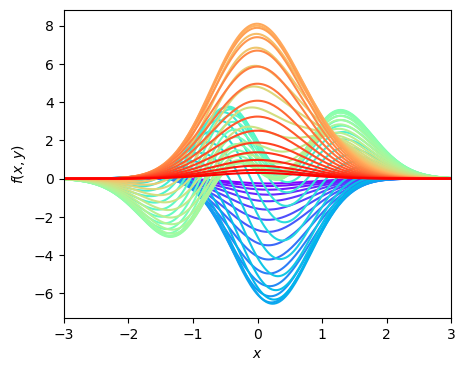

In [14]:
x1_array  = np.linspace(-3, 3, 200)
x2_slices = np.linspace(-3,3,6*10 + 1)

num_lines = len(x2_slices)

colors = cm.rainbow(np.linspace(0,1,num_lines))
# 选定色谱，并产生一系列色号

fig, ax = plt.subplots(figsize = (5,4))

for idx, x2_idx in enumerate(x2_slices):
    
    ff_idx = f_xy_fcn(x1_array,x1_array*0 + x2_idx)
    legend_idx = '$x_2$ = ' + str(x2_idx)
    plt.plot(x1_array, ff_idx, color=colors[idx], label = legend_idx)
    # 依次绘制概率密度曲线

# plt.legend()
# 增加图例

plt.xlim(x1_array.min(),x1_array.max())
# plt.ylim(-8,8)
plt.xlabel('$x$')
plt.ylabel('$f(x,y)$')

fig.savefig('Figures/在xz平面投影_for循环.svg', format='svg')

### 3. 在yz平面投影

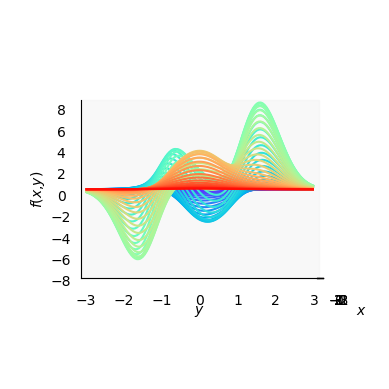

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

level_array = np.linspace(-3,3,61)
ax.contour(xx, yy, ff, zdir='x', levels = level_array, cmap='rainbow')

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x}$')
ax.set_ylabel('$\it{y}$')
ax.set_zlabel('$\it{f}$($\it{x}$,$\it{y}$)')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_zlim(-8,8)
ax.view_init(azim=0, elev=0)
ax.grid(False)
fig.savefig('Figures/在yz平面投影.svg', format='svg')

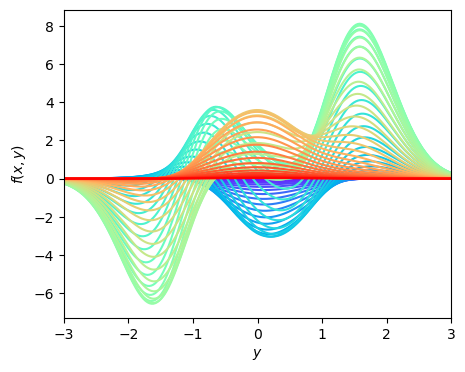

In [16]:
x2_array  = np.linspace(-3, 3, 200)
x1_slices = np.linspace(-3,3,6*10 + 1)

num_lines = len(x1_slices)

colors = cm.rainbow(np.linspace(0,1,num_lines))
# 选定色谱，并产生一系列色号

fig, ax = plt.subplots(figsize = (5,4))

for idx, x1_idx in enumerate(x1_slices):
    
    ff_idx = f_xy_fcn(x2_array*0 + x1_idx,x2_array)
    legend_idx = '$x_1$ = ' + str(x1_idx)
    plt.plot(x2_array, ff_idx, color=colors[idx], label = legend_idx)

# plt.legend()
# 增加图例

plt.xlim(x2_array.min(),x2_array.max())
# plt.ylim(-8,8)
plt.xlabel('$y$')
plt.ylabel('$f(x,y)$')

fig.savefig('Figures/在yz平面投影_for循环.svg', format='svg')


In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023